In [32]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
data = pd.read_csv('ETC.csv', parse_dates=True)

In [34]:
data[:25].to_csv('sample.csv')

In [7]:
data.dtypes

PrevDay           float64
OpenSellOrders      int64
Volume            float64
Last              float64
Created            object
TimeStamp          object
Bid               float64
OpenBuyOrders       int64
High              float64
MarketName         object
Low               float64
Ask               float64
BaseVolume        float64
dtype: object

In [8]:
data.head()

,PrevDay,OpenSellOrders,Volume,Last,Created,TimeStamp,Bid,OpenBuyOrders,High,MarketName,Low,Ask,BaseVolume
0,0.002493,941,37046.988183,0.002526,2016-07-26T18:10:22.82,2017-04-01T17:17:13.333,0.002537,313,0.002647,BTC-ETC,0.002493,0.002572,94.691996
1,0.002493,940,37046.988183,0.002526,2016-07-26T18:10:22.82,2017-04-01T17:18:05.63,0.002537,315,0.002647,BTC-ETC,0.002493,0.002572,94.691996
2,0.002493,940,37046.988183,0.002526,2016-07-26T18:10:22.82,2017-04-01T17:18:09.71,0.002537,316,0.002647,BTC-ETC,0.002493,0.002572,94.691996
3,0.002493,940,37046.988183,0.002526,2016-07-26T18:10:22.82,2017-04-01T17:19:08.1,0.002538,314,0.002647,BTC-ETC,0.002493,0.002572,94.691996
4,0.002493,940,37046.988183,0.002526,2016-07-26T18:10:22.82,2017-04-01T17:20:10.96,0.002539,313,0.002647,BTC-ETC,0.002493,0.002572,94.691996


In [9]:
data.columns = data.columns.str.lower()

In [10]:
data['timestamp'] = pd.to_datetime(data.timestamp)

In [11]:
data['created'] = pd.to_datetime(data.created)

In [12]:
data.set_index('timestamp', inplace=True)
scscsedfsdf

In [13]:
data['n'] = 1

### the number of data points per day

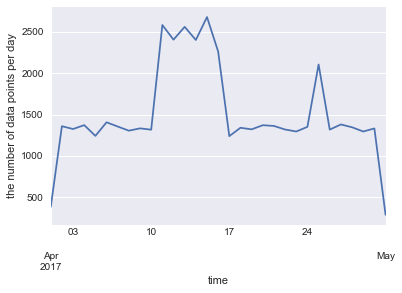

In [64]:
data.resample('d').n.count().plot()
plt.ylabel('the number of data points per day')
plt.xlabel('time');


### the diffrance between bid and ask

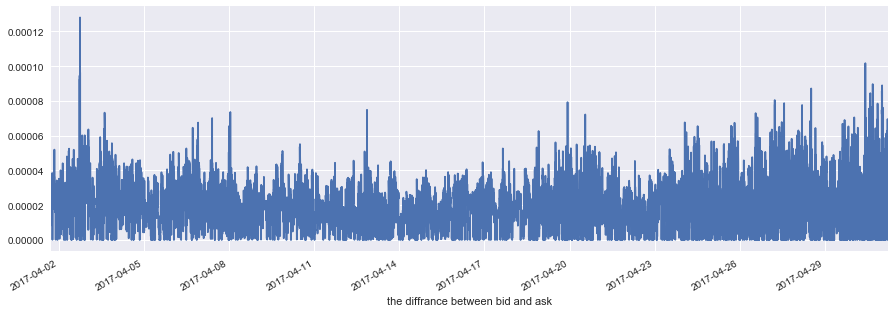

In [50]:
(data.ask - data.bid).plot(figsize=(15,5))
plt.xlabel('the diffrance between bid and ask') ;

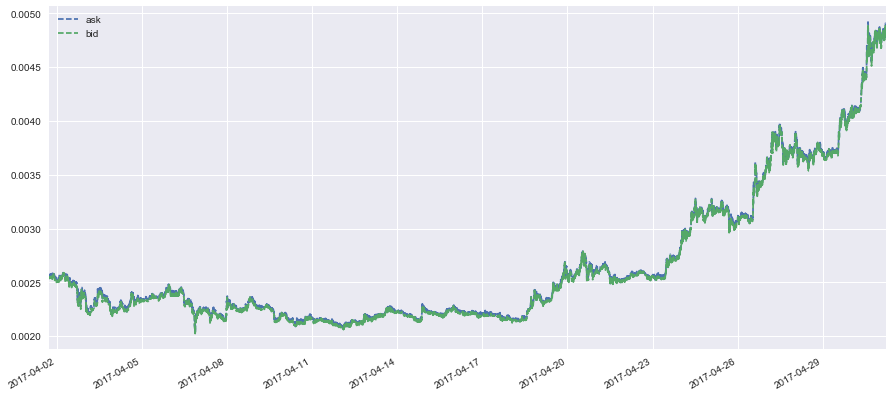

In [60]:
data[['ask','bid']].plot(figsize=(15,7), linestyle='dashed')
plt.xlabel(' ');

## the volume for every day in the month

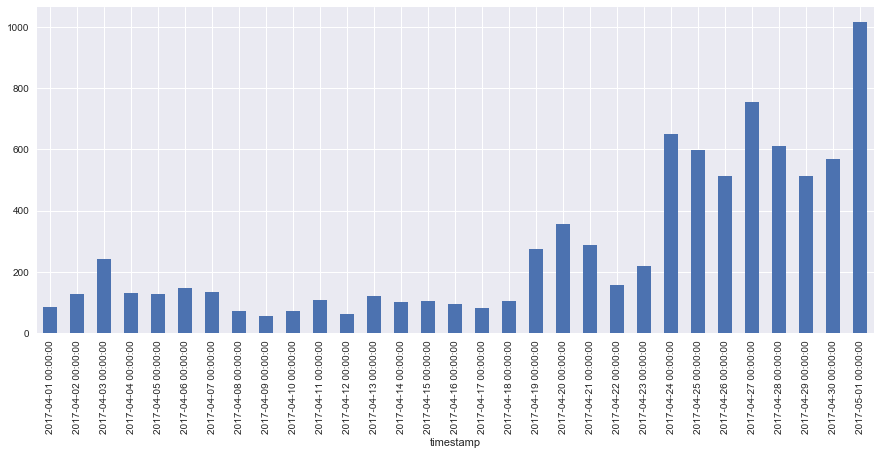

In [77]:
data.resample('d').basevolume.mean().plot(kind='bar', figsize=(15,6));

In [8]:
f = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
days = np.array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

## the volume grouped by day

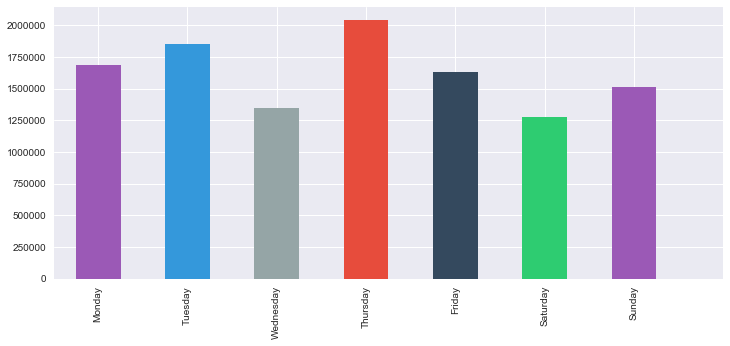

In [70]:
data.groupby(data.index.dayofweek)['basevolume'].sum().plot(kind='bar' ,figsize=(12,5),color=f)
plt.xticks(np.arange(8),days);

## the volume grouped by hour

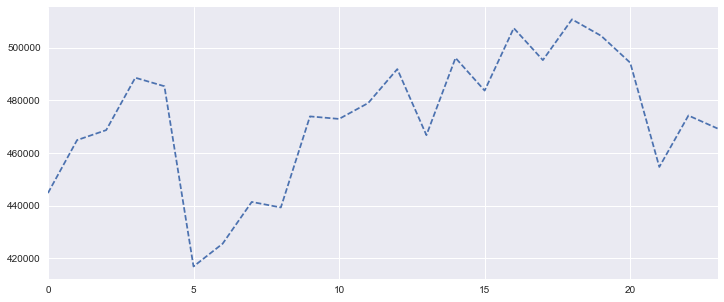

In [75]:
data.groupby(data.index.hour)['basevolume'].sum().plot(linestyle='dashed' ,figsize=(12,5));

In [14]:
data['hl_diff'] = data.high - data.low

## the change of the diffrance between thw high and low over the month

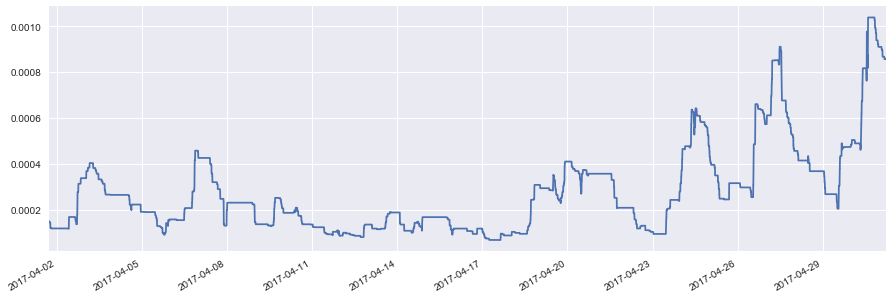

In [83]:
data.hl_diff.plot(figsize=(15,5))
plt.xlabel(' ');

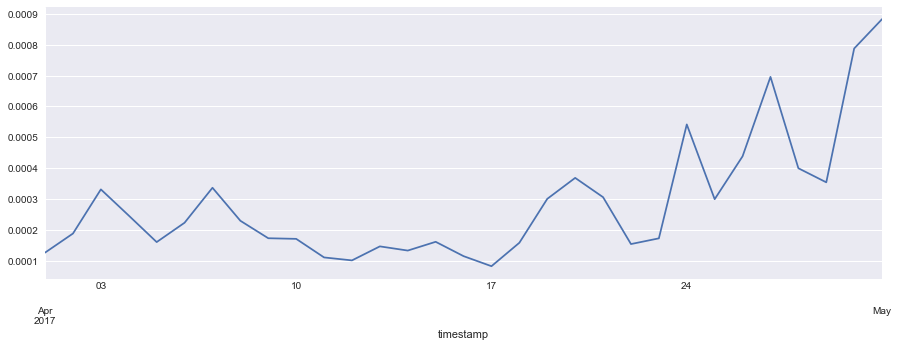

In [88]:
data.resample("d").hl_diff.mean().plot(figsize=(15,5));

In [15]:
data['next'] = data.ask.shift(1)

In [16]:
data['change'] = (data.next - data.ask)

### the averages movement 

In [17]:
np.abs(data.change.mean())

4.9786739954834044e-08

In [18]:
def up_down(row):
    if row > 0:
        return 'up'
    elif row < 0:
        return 'down'
    else:
        return np.nan    

In [19]:
data['up_down'] = data.change.apply(up_down)

In [20]:
data.up_down.value_counts()

up      27785
down     5732
Name: up_down, dtype: int64

## up & down movments  

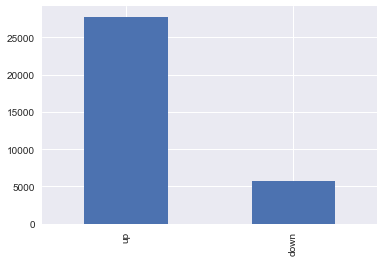

In [21]:
data.up_down.value_counts().plot(kind='bar')

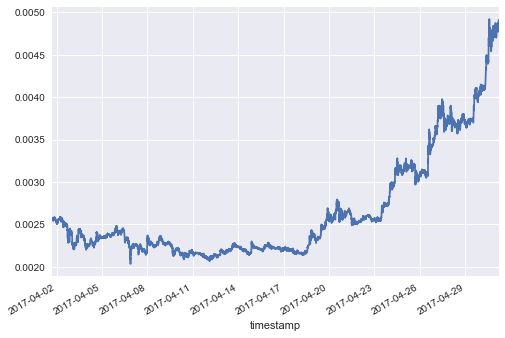

In [31]:
data.ask.plot()

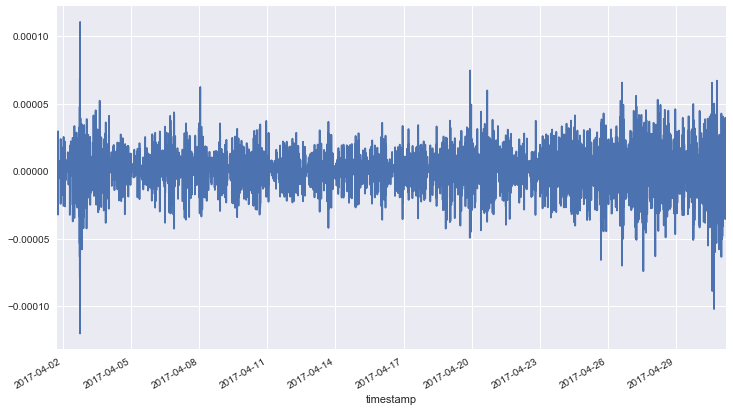

In [34]:
data.change.plot(figsize=(12,7))

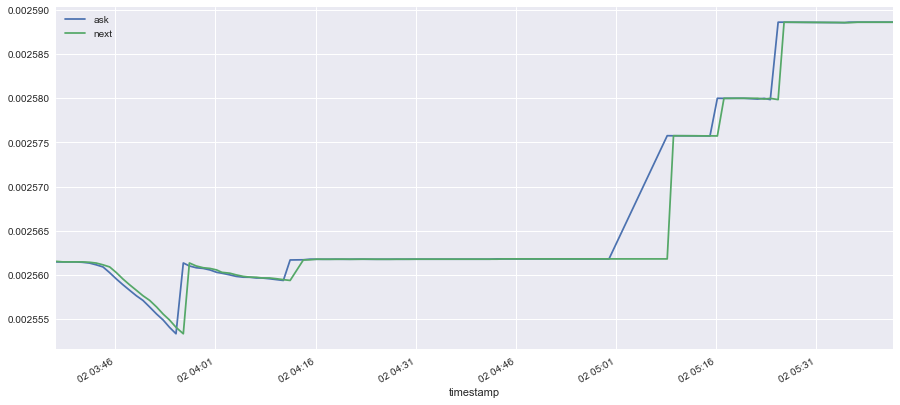

In [59]:
data[['ask','next']][600:700].plot(figsize=(15,7))

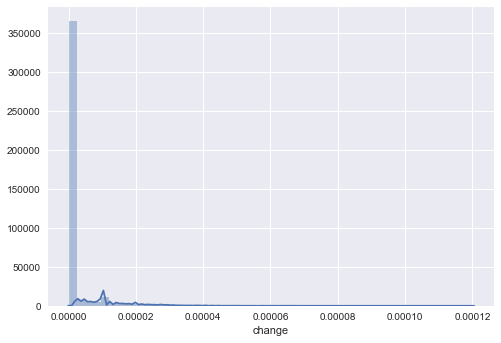

In [80]:
sns.distplot(np.abs(data.change.dropna()),kde=True,)

### SMA

In [22]:
data['sma_5'] = data['ask'].rolling(5).mean()
data['sma_10'] = data['ask'].rolling(10).mean()
data['sma_20'] = data['ask'].rolling(20).mean()

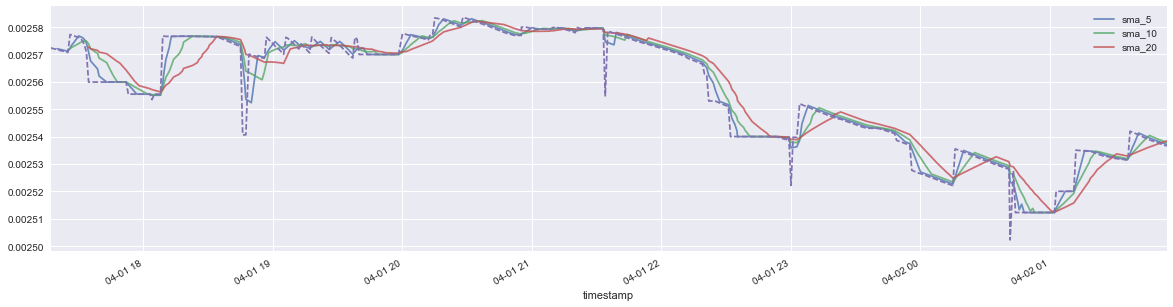

In [23]:
data[['sma_5','sma_10','sma_20']][:500].plot(figsize=(20,5),alpha=0.8)
data['ask'][:500].plot(linestyle='dashed')

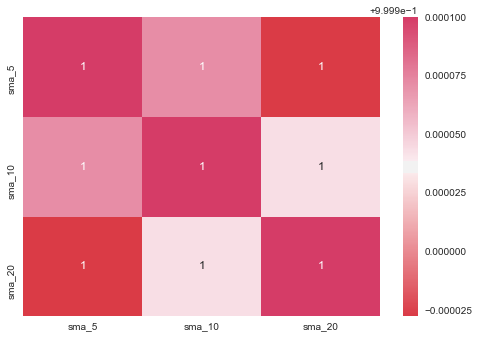

In [95]:
cmap = sns.diverging_palette(10, 1, as_cmap=True)
sns.heatmap(data[['sma_5','sma_10','sma_20']].corr(),annot=True,cmap=cmap)

In [104]:
data = data.dropna()

In [23]:
data['pc_ch_5'] = data.sma_5.pct_change()

In [24]:
data['pc_ch_10'] = data.sma_10.pct_change()

In [25]:
data['pc_ch_20'] = data.sma_20.pct_change()

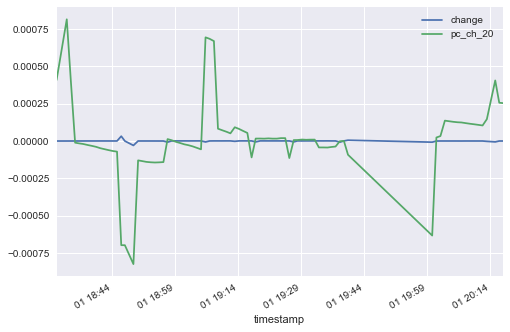

In [119]:
data[['change','pc_ch_20']][15:100].plot() 

In [121]:
data.head()

,prevday,opensellorders,volume,last,created,bid,openbuyorders,high,marketname,low,...,n,change,next,up_down,sma_5,sma_20,sma_10,pc_ch_5,pc_ch_10,pc_ch_20
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-04-01 17:34:47.610,0.002550,941,36973.670938,0.002550,2016-07-26 18:10:22.820,0.002550,320,0.002647,BTC-ETC,0.0025,...,1,1.099000e-05,0.002571,up,0.002571,0.002573,0.002574,NaN,NaN,NaN
2017-04-01 17:45:10.017,0.002596,941,37103.433177,0.002538,2016-07-26 18:10:22.820,0.002539,317,0.002647,BTC-ETC,0.0025,...,1,-8.000000e-08,0.002560,down,0.002560,0.002569,0.002564,-0.004257,-0.003896,-0.001409
2017-04-01 17:47:11.330,0.002596,945,37102.998832,0.002538,2016-07-26 18:10:22.820,0.002540,319,0.002647,BTC-ETC,0.0025,...,1,8.000000e-08,0.002560,up,0.002560,0.002568,0.002561,0.000006,-0.001080,-0.000440
2017-04-01 17:48:06.080,0.002596,946,37102.998832,0.002538,2016-07-26 18:10:22.820,0.002540,316,0.002647,BTC-ETC,0.0025,...,1,-8.000000e-08,0.002560,down,0.002560,0.002567,0.002560,0.000006,-0.000426,-0.000213
2017-04-01 17:49:12.203,0.002596,946,37055.298095,0.002538,2016-07-26 18:10:22.820,0.002536,318,0.002647,BTC-ETC,0.0025,...,1,8.000000e-08,0.002560,up,0.002560,0.002567,0.002560,0.000000,0.000000,-0.000211


In [26]:
data['sma5_ask_diff'] = (data.sma_5  - data.ask)

In [27]:
data['sma10_ask_diff'] = (data.sma_10  - data.ask)

In [28]:
data['sma20_ask_diff'] = (data.sma_20  - data.ask)

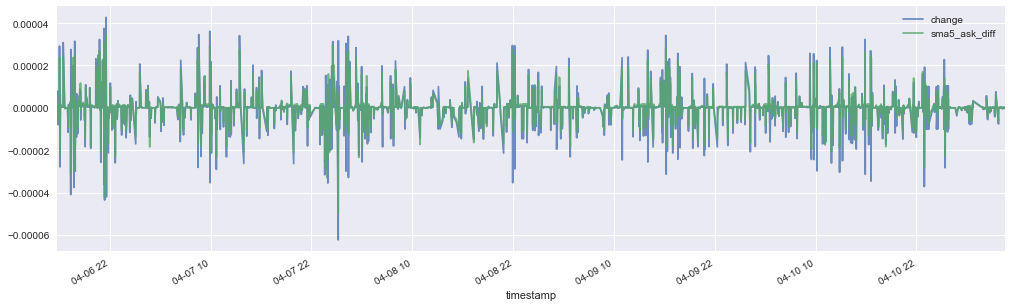

In [143]:
data[['change','sma5_ask_diff']][5000:10000].plot(alpha=0.8, figsize=(17,5));

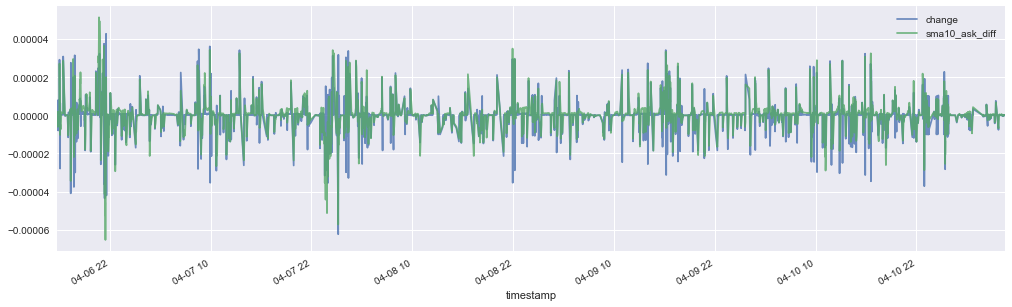

In [144]:
data[['change','sma10_ask_diff']][5000:10000].plot(alpha=0.8, figsize=(17,5));

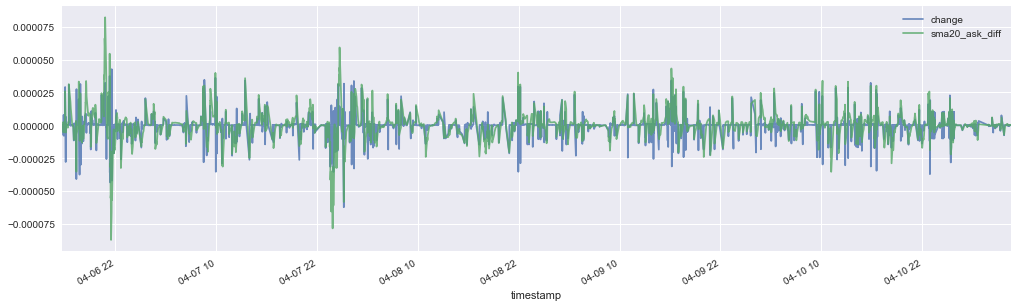

In [145]:
data[['change','sma20_ask_diff']][5000:10000].plot(alpha=0.8, figsize=(17,5));

In [146]:
data.columns

Index(['prevday', 'opensellorders', 'volume', 'last', 'created', 'bid',
       'openbuyorders', 'high', 'marketname', 'low', 'ask', 'basevolume', 'n',
       'change', 'next', 'up_down', 'sma_5', 'sma_20', 'sma_10', 'pc_ch_5',
       'pc_ch_10', 'pc_ch_20', 'sma_ask_diff', 'sma5_ask_diff',
       'sma10_ask_diff', 'sma20_ask_diff'],
      dtype='object')

In [149]:
data[['sma20_ask_diff','sma_20']][:10]

,sma20_ask_diff,sma_20
timestamp,,
2017-04-01 17:34:47.610,0.000013,0.002573
2017-04-01 17:45:10.017,0.000009,0.002569
2017-04-01 17:47:11.330,0.000008,0.002568
2017-04-01 17:48:06.080,0.000007,0.002567
2017-04-01 17:49:12.203,0.000007,0.002567
2017-04-01 17:53:10.160,0.000008,0.002563
2017-04-01 18:04:07.663,0.000004,0.002557
2017-04-01 18:05:10.773,0.000001,0.002557
2017-04-01 18:09:07.820,-0.000020,0.002557


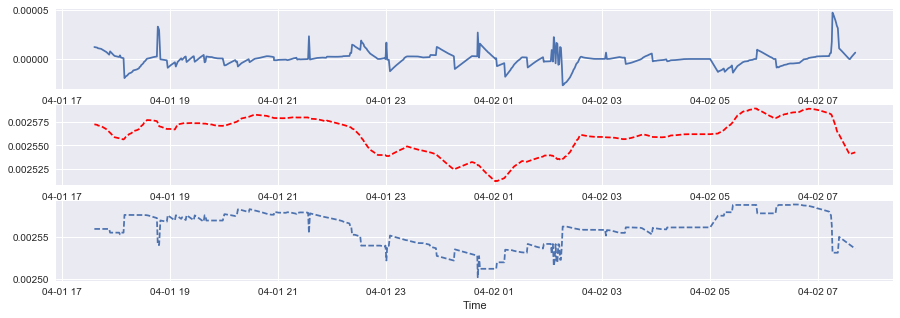

In [42]:
plt.figure(1,figsize=(15,5))
plt.subplot(311)
plt.plot(data.sma20_ask_diff[20:800])

plt.subplot(312)
plt.plot(data.sma_20[20:800], 'r--')


plt.subplot(313)
plt.plot(data.ask[20:800], '--')
plt.xlabel('plotting the diffrance between the percentage change ')

plt.show()

In [29]:
data.columns

Index(['prevday', 'opensellorders', 'volume', 'last', 'created', 'bid',
       'openbuyorders', 'high', 'marketname', 'low', 'ask', 'basevolume', 'n',
       'hl_diff', 'next', 'change', 'up_down', 'sma_5', 'sma_10', 'sma_20',
       'pc_ch_5', 'pc_ch_10', 'pc_ch_20', 'sma5_ask_diff', 'sma10_ask_diff',
       'sma20_ask_diff'],
      dtype='object')

In [30]:
data['spread'] = data.high - data.low

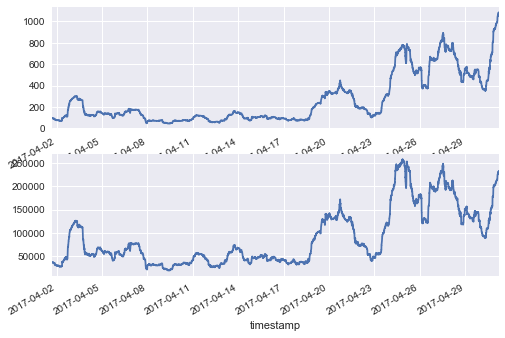

In [47]:
plt.figure(1)
plt.subplot(211)
data['basevolume'].plot()

plt.subplot(212)
data.volume.plot()

In [3]:
to_drop = ['timestamp','prevday','opensellorders','last','created','bid','openbuyorders','marketname','low','n','high','basevolume']
data.drop(to_drop,axis=1,inplace=True)

data.dropna(inplace=True)

data['up_down'] = data.up_down.map({'up':1,'down':0})



In [31]:
y = data.up_down.to_csv('y.csv')
data.drop('up_down',axis=1,inplace=True)
X = data.to_csv('X.csv')